# Spatial operations

In [1]:
# Mount Google Drive to Google Colab
from google.colab import drive
drive.mount('/content/drive')

# Go to My Drive folder
%cd drive/My\ Drive

# Download Github repository
!git clone https://github.com/MatthiasDR96/machine_vision.git

Mounted at /content/drive
/content/drive/My Drive
fatal: destination path 'machine_vision' already exists and is not an empty directory.


In [2]:
# Imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# For use in Google Colab
%cd /content/drive/MyDrive/machine_vision/scripts/1_image_processing

/content/drive/MyDrive/machine_vision/scripts/1_image_processing


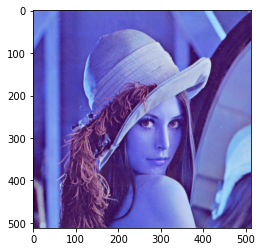

In [ ]:
# Load image
img = cv2.imread('../../data/lenna_test_image.png')
plt.imshow(img)
plt.show()

### Convolutional kernels: Mean kernel

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]
[[71 71 71 71 71 71 70 70 70 70]
 [71 71 71 71 71 71 70 70 70 70]
 [71 71 71 71 71 71 70 70 70 70]
 [71 71 71 71 71 71 70 71 70 70]
 [71 71 71 71 71 71 71 71 70 71]
 [71 71 71 71 71 71 70 70 70 70]
 [71 71 71 71 71 71 70 70 70 70]
 [71 71 71 71 71 71 70 71 70 70]
 [71 71 71 71 71 71 71 71 71 71]
 [71 71 71 71 71 71 71 71 71 71]]


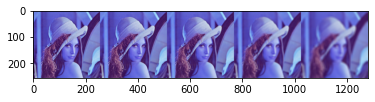

In [ ]:
# Define array
array = img[100:110, 100:110, 1]

# Define convolutional kernel
kernel = np.ones((3, 3), np.float32) / 9
result = cv2.filter2D(img, -1, kernel)
result = cv2.resize(result, (0, 0), None, .5, .5)

# Define convolutional kernel
kernel1 = np.ones((5, 5), np.float32) / 25
result1 = cv2.filter2D(img, -1, kernel1)
result1 = cv2.resize(result1, (0, 0), None, .5, .5)

# Define convolutional kernel
kernel2 = np.ones((10, 10), np.float32) / 100
result2 = cv2.filter2D(img, -1, kernel2)
result2 = cv2.resize(result2, (0, 0), None, .5, .5)

# Define convolutional kernel
kernel3 = np.ones((20, 20), np.float32) / 400
result3 = cv2.filter2D(img, -1, kernel3)
result3 = cv2.resize(result3, (0, 0), None, .5, .5)

# Array result
Z = cv2.filter2D(array, -1, kernel3)
print(Z)

# Concatenate results
img = cv2.resize(img, (0, 0), None, .5, .5)
result = np.concatenate((img, result, result1, result2, result3), axis=1)

# Plot results
plt.imshow(result)
plt.show()


### Convolutional kernels: Gaussian kernel 

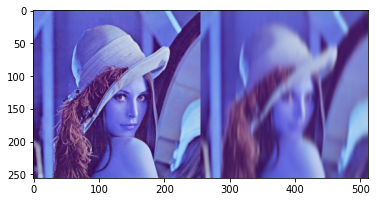

In [ ]:
# Perform convolution
result = cv2.GaussianBlur(img, (3, 33), 0)

# Concatenate images
result = np.concatenate((img, result), axis=1)

# Plot results
plt.imshow(result)
plt.show()

### Convolutional kernel: sharpening

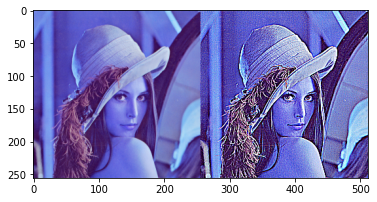

In [ ]:
# Define convolutional kernel
kernel = np.ones((3, 3), np.float32) * -1
kernel[1][1] = 9

# Perform convolution
result = cv2.filter2D(img, -1, kernel)

# Concatenate images
result = np.concatenate((img, result), axis=1)

# Plot results
plt.imshow(result)
plt.show()

### Convolutional kernel: edge detection

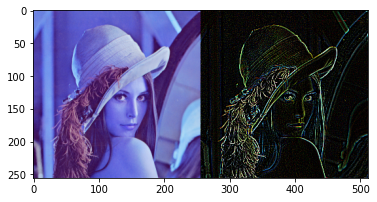

In [ ]:
# Define convolutional kernel
kernel = np.ones((3, 3), np.float32) * -1
kernel[1][1] = 8

# Perform convolution
result = cv2.filter2D(img, -1, kernel)

# Concatenate images
result = np.concatenate((img, result), axis=1)

# Plot results
plt.imshow(result)
plt.show()

### Template matching

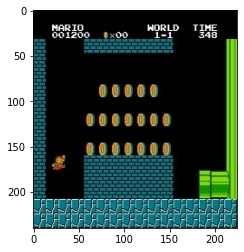

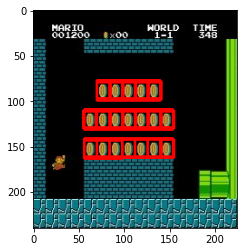

In [34]:
# Load the source image and the template
img = cv2.imread('../../data/mario.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
template = cv2.imread('../../data/mario_coin.jpg', 0)
w, h = template.shape[::-1]
source = img.copy()

# Template matching 
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
  cv2.rectangle(img, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(cv2.cvtColor(source, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()